<a href="https://colab.research.google.com/github/ingenziart/0xN0x/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC

warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
# import sys
# np.set_printoptions(threshold=sys.maxsize)
!pip install catboost
!pip install imblearn
!pip install tensorflow
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [70]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    RocCurveDisplay,
    f1_score
)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# Importing the dataset

In [71]:
dataset = pd.read_csv('data.csv')


# Data exploataion

 **Understanding the data**


 Process of analysing data to better understand it; it can also be used to prepare data for pre processing modelling.

In [152]:
dataset.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [151]:

dataset.dtypes


,0
gender,object
age,int64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [150]:
dataset.shape


(4908, 11)

In [149]:
dataset.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868989,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.555878,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


 **checking all unique values**

In [76]:
dataset.nunique()

,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


**Checking outliers**
From the output above i can tell that bmi and avg_glucose_level have a large number of uniqure values  value. thise feature will be needed to check for outliers`

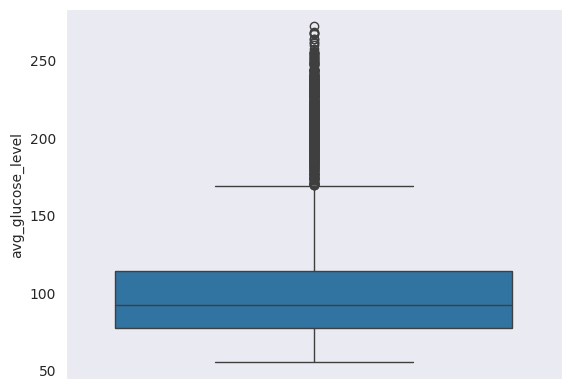

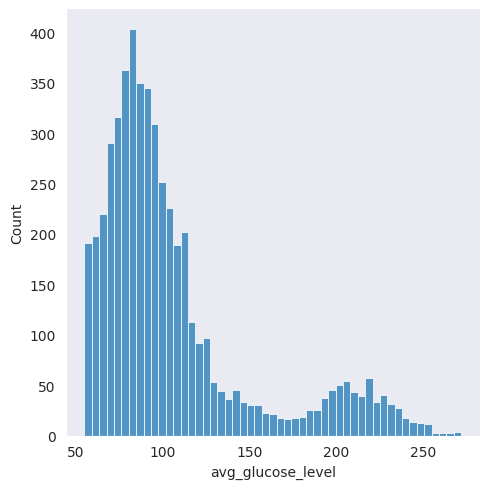

In [77]:

# Box plot
sns.boxplot(dataset.avg_glucose_level)

# Distribution plot
sns.displot(dataset.avg_glucose_level)

**Investigate into Age, Average Glucose Level, BMI**


Further investigate into Age, Average Glucose Level, BMI to spot for any corelation

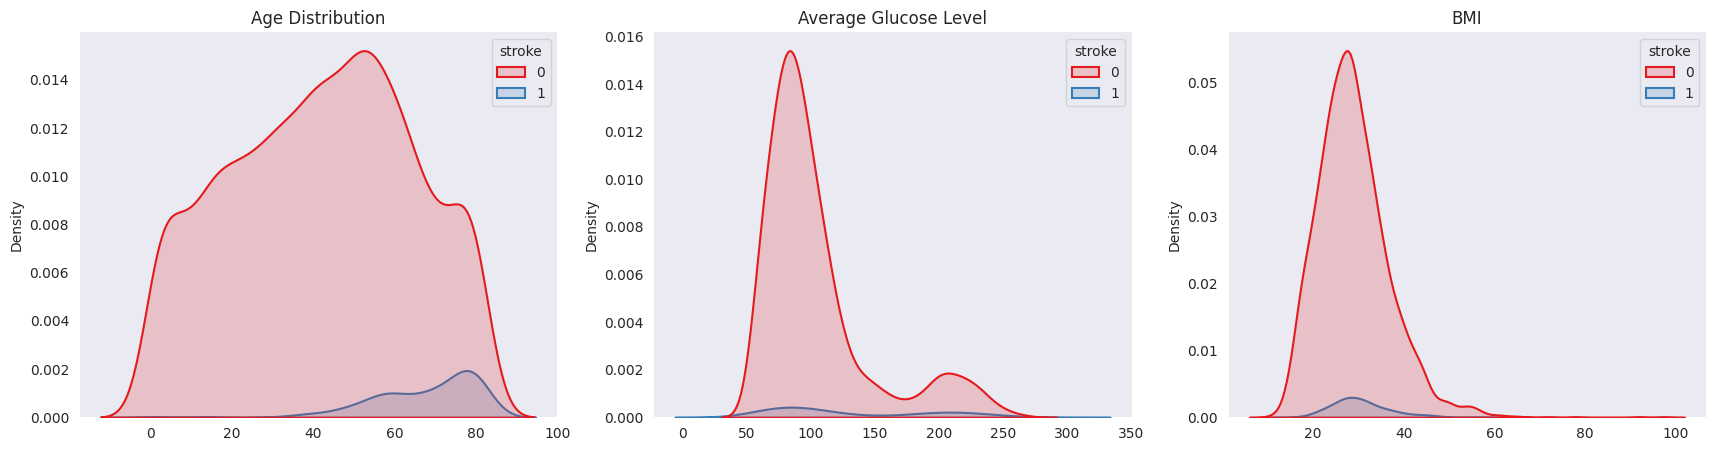

In [78]:

sns.set_style('dark')

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x='age', alpha=0.2, palette="Set1", label='Smoker', data =dataset, fill=True, linewidth=1.5, hue='stroke');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age Distribution');

plt.subplot(1,3,2)
sns.kdeplot(x=dataset['avg_glucose_level'], alpha=0.2, palette="Set1", label='avg_glucose_level',linewidth=1.5, fill=True, hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Average Glucose Level');

plt.subplot(1,3,3)
sns.kdeplot(x='bmi', alpha=0.2, palette="Set1", label='BMI',data = dataset, shade=True, linewidth=1.5, fill=True, hue='stroke');
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('BMI');

## Cleaning the data

**checking for null value**

In [153]:
dataset.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [80]:
len(dataset.bmi)

5110

**Cleaning the data**

In [154]:

dataset = dataset.dropna()


In [155]:

if 'id' in dataset.columns:
    dataset = dataset.drop('id', axis=1)

dataset.drop(dataset.loc[dataset['gender']=='Other'].index, inplace=True)
dataset.age = dataset.age.round().astype('int')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Relationship analysis

<Axes: >

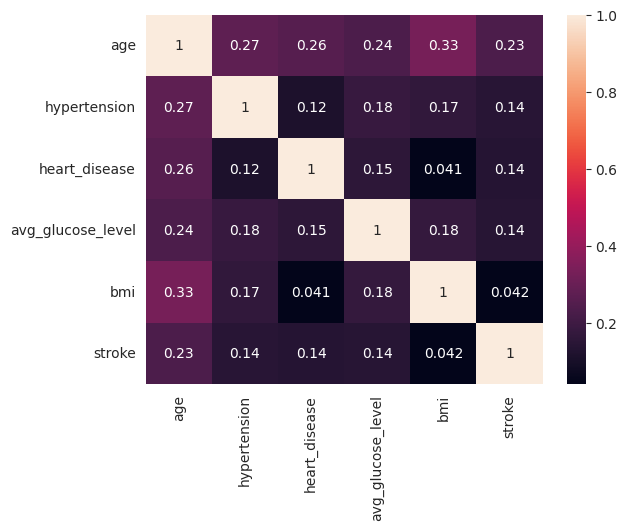

In [156]:

numerical_features = dataset.select_dtypes(include=['number'])


corre = numerical_features.corr()

sns.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns, annot=True)


 **Visualising features**

 Start making some assumptions

1.   Choice of residence, work, type, and glucose level can have effect possibility of one getting stroke  
2.    Gender, hypertension and any history of heart diseases effect the stroke probability¶



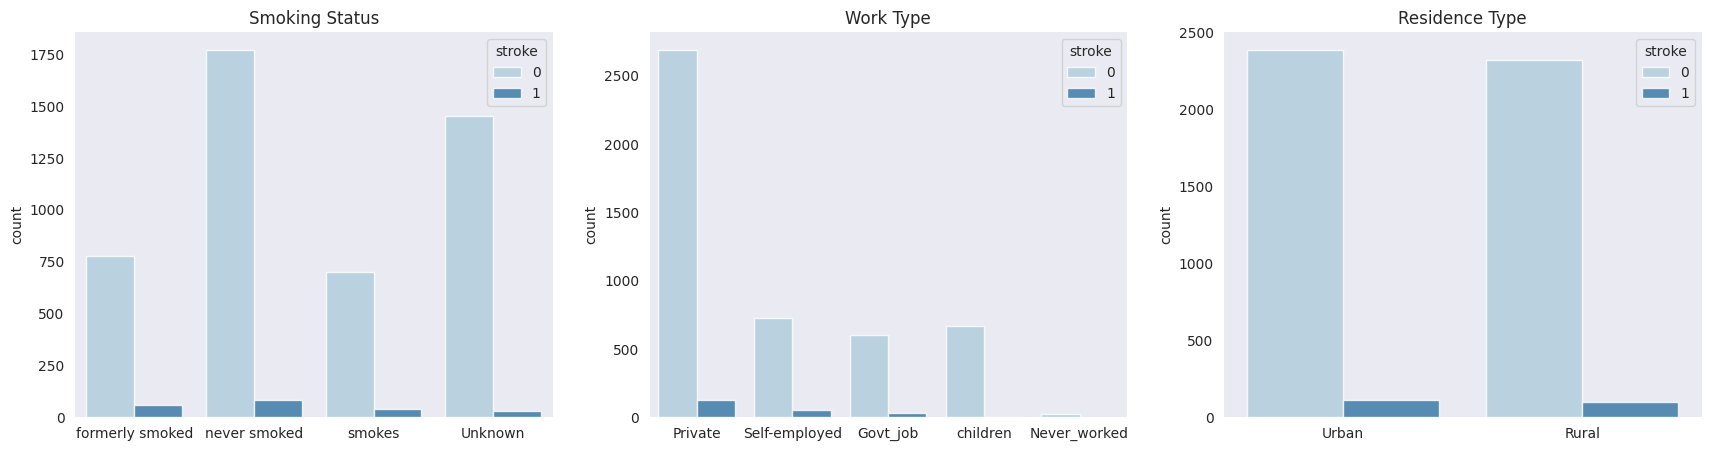

In [157]:


plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x='smoking_status', alpha=0.8, palette="Paired",hue='stroke', data = dataset );
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Smoking Status');

plt.subplot(1,3,2)
sns.countplot(x='work_type', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Work Type');

plt.subplot(1,3,3)
sns.countplot(x='Residence_type', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Residence Type');



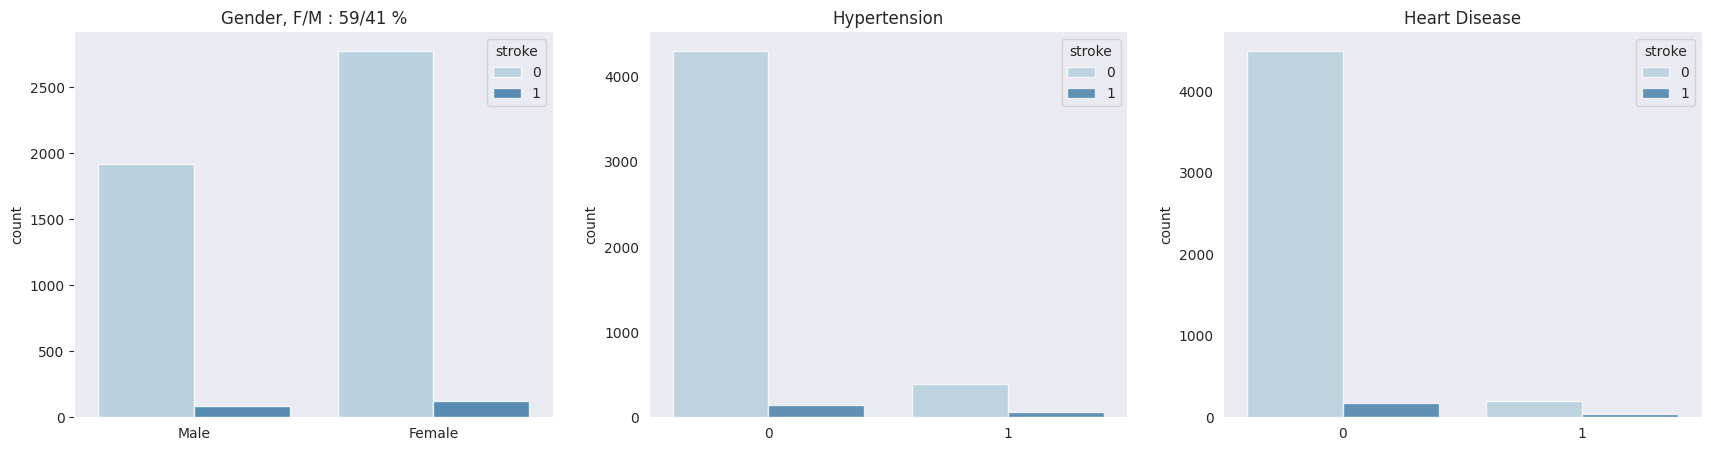

In [158]:

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x='gender', alpha=0.8, palette="Paired", hue='stroke',data = dataset);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender, F/M : 59/41 %');

plt.subplot(1,3,2)
sns.countplot(x='hypertension', alpha=0.75, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hypertension');

plt.subplot(1,3,3)
sns.countplot(x='heart_disease', alpha=0.75, palette="Paired", hue='stroke',data = dataset);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Heart Disease');

**check the ratio of the two to see the imbalances**

In [86]:

print("Patient that dont stroke ratio: " + str(dataset.stroke.value_counts()[1]/len(dataset)))
print("Patient that have stroke ratio : " + str(dataset.stroke.value_counts()[0]/len(dataset)))
dataset.stroke.value_counts()
dataset.stroke.value_counts()

Patient that dont stroke ratio: 0.04258353708231459
Patient that have stroke ratio : 0.9574164629176855


,count
stroke,
0,4699
1,209


Visualise age distribution


<Figure size 2100x500 with 0 Axes>

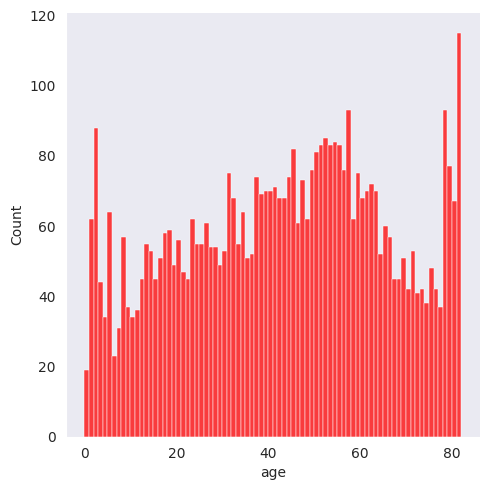

In [87]:
plt.figure(figsize=(21,5))
sns.displot(dataset['age'], bins=max(dataset['age']),color='red', kde=False);

**Visualise age and stroke **
this is need to check the ccorrelation betwen the row varibale


<Figure size 1000x500 with 0 Axes>

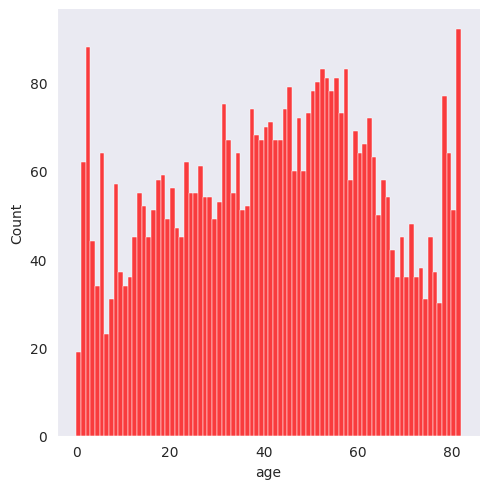

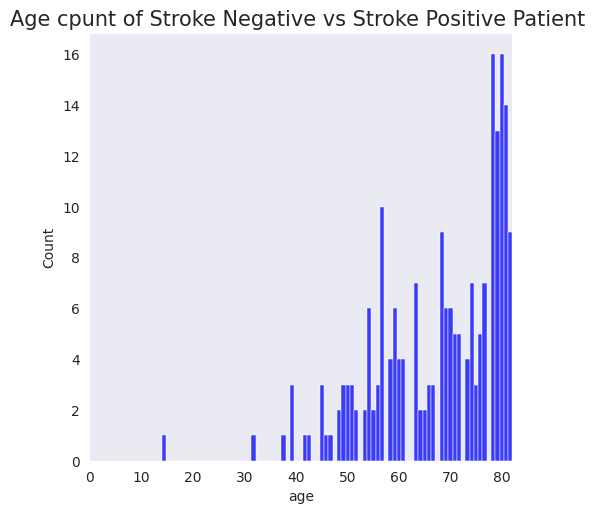

In [88]:
plt.figure(figsize=(10, 5))

sns.displot(dataset[dataset['stroke'] == 0]["age"], bins=max(dataset['age']), color='red',kde=False)
sns.displot(dataset[dataset['stroke'] == 1]["age"], bins=max(dataset['age']), color='blue', kde=False)

plt.title('Age cpunt of Stroke Negative vs Stroke Positive Patient ', fontsize=15)
plt.xlim([min(dataset['age']),max(dataset['age'])])
plt.show()

# Data Preprocessing

Slicing the dataset into dependent and independent variable

In [89]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data with label encoder


label encoding is used for datapoint with only two values

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,4] = le.fit_transform(X[:,4])
X[:,6] = le.fit_transform(X[:,6])


### One Hot Encoding the "Work_type and  "somke_status" column" column

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',
OneHotEncoder(), [5,9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Note** Onehotencoder is used one  datapoint with only two or more values which have numeric order

In [159]:
X

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.287e+02,
        3.660e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.059e+02,
        3.250e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 1.712e+02,
        3.440e+01],
       ...,
       [0.000e+00, 0.000e+00, 8.027e-01, ..., 1.000e+00, 7.256e+01,
        3.191e+01],
       [4.866e-01, 0.000e+00, 0.000e+00, ..., 1.000e+00, 7.990e+01,
        2.731e+01],
       [8.466e-03, 0.000e+00, 9.915e-01, ..., 8.466e-03, 2.084e+02,
        3.246e+01]])

In [160]:
X.shape

(9398, 17)

In [92]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X, y = sm.fit_resample(X, y)


### Feature Selection

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)

X = fit.transform(X)

[1.734e+00 2.200e+01 7.701e+00 9.699e+01 6.337e+02 2.752e+02 1.257e+02
 1.011e+00 2.446e+01 8.875e+00 2.937e+04 5.204e+02 4.521e+02 1.949e+02
 7.631e-01 1.876e+04 1.542e+02]


In [94]:
#patient to be used for preditction
patient = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]

## Splitting dateset

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size=0.2, random_state = 1)



**Handling imbalances data**

Verifying of  oversampling

In [96]:
X_test

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.354e+02,
        3.255e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 1.977e+02,
        2.840e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 9.913e+01,
        2.280e+01],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 5.131e-01, 2.078e+02,
        3.373e+01],
       [0.000e+00, 0.000e+00, 9.505e-01, ..., 4.946e-02, 8.898e+01,
        2.310e+01],
       [5.979e-01, 0.000e+00, 4.021e-01, ..., 0.000e+00, 1.690e+02,
        2.762e+01]])

In [161]:
X_train

array([[-0.435, -0.05 , -0.713, ...,  1.064,  2.023, -0.411],
       [ 0.514, -0.05 ,  0.245, ...,  0.421, -0.097,  0.575],
       [ 1.319, -0.05 , -0.305, ...,  1.064, -0.383, -1.112],
       ...,
       [-0.435, -0.05 ,  0.895, ..., -1.11 , -0.751, -0.501],
       [-0.435, -0.05 ,  0.895, ...,  1.064, -0.539,  1.217],
       [ 2.776, -0.05 , -1.302, ..., -1.11 , -0.442, -0.163]])

In [162]:
print(y_test)

[1 0 0 ... 1 1 1]


In [163]:
print(y_train)

[1 1 1 ... 0 1 0]


## Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [164]:
print(X_test)

[[-0.435 -0.05   0.895 ... -1.11   2.089  0.447]
 [-0.435 -0.05   0.895 ...  1.064  1.411 -0.163]
 [-0.435 -0.05  -1.302 ...  1.064 -0.361 -0.985]
 ...
 [-0.435 -0.05   0.895 ...  0.006  1.592  0.62 ]
 [-0.435 -0.05   0.786 ... -1.002 -0.543 -0.942]
 [ 1.485 -0.05  -0.419 ... -1.11   0.895 -0.277]]


# Helper Functions

**Prediction Function**

In [101]:
#this function will be use to make predictions after models is train
def prediction(classifier, X=X_test):
  y_pred = classifier.predict(X)

  print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
  print()

     #this condition check if model accuracy is below 90% if so it apply tunning using gridsearch
  if accuracy_score(y_test, y_pred) < 0.90:
    print("MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED ")
    grid_search_tunning(classifier,parameters)

  print()
  # Predicting the Test set results
  print("Predicting the Test set results ")
  #matching all predtiction with true values this help eliminate overfiting
  print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
  print()
  print(f" Predicting for: ")
  #get the patient that will be used to make prediction from dataset
  print(dataset[:1])
  print(f" y_predicted :{classifier.predict(sc.transform([patient]))}")
  print("==================================================================")
  print()





**Function for training models**

In [102]:
def trainmodels(classifier, X_train, y_train):

  #this function takes the untrain models, train it then return the train model

  classifier.fit(X_train, y_train)
  #calling the prediction function to make predictions on the train models
  prediction(classifier)
  #making confusion matrix
  makin_confusion_matrix(classifier)


  #this function return nthe train model.
  return classifier


**Making the Confusion Matrix Function**

In [103]:
def makin_confusion_matrix(classifier,X=X_test):
  #this function takes train model and make matrix on it
  y_pred = classifier.predict(X)
  cm = confusion_matrix(y_test, y_pred )
  classifier_report=classification_report(y_test, y_pred )
  print()
  print("Making the Confusion Matrix")
  print("**************************")
  print("Accuracy: {:.2f} %".format(accuracy_score(y_test,y_pred)*100))
  print(cm)
  print("")
  print("")
  print("Accuracy repeort")
  print(classifier_report)





**Plot Confusion matrix function **

In [104]:
def plot_confusion_matrix(classifier, X=X_test):
  y_pred = classifier.predict(X)
  cm_map = sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap='OrRd', fmt='g')
  plt.show(cm_map)

**Function for app K-Fold cross validation**

In [105]:
def k_fold_cross_validation(classifier, X_train, y_train, cv:int):
  print("****************************************************")
  accuracies = cross_val_score(estimator =  classifier, X = X_train, y = y_train, cv = 15)
  print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



**Function for Grid search fine tuning**

**Note:** tunning is only apply to models with accuracy below 90%

In [165]:
def grid_search_tunning (classifier,parameters):
  grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, verbose=1, cv=10, n_jobs=-1)
  grid_search.fit(X_train, y_train)
  best_accuracy = grid_search.best_score_
  best_parameters = grid_search.best_params_
  print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
  print("Best Parameters:", best_parameters)

# Classifications Modeling

## Logistic Regression

In [167]:

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
    'class_weight': ['balanced']
}


lr = LogisticRegression(solver='liblinear', max_iter=1000)


LR = GridSearchCV(lr, parameters, cv=5, scoring='accuracy')
LR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

**Tunning using GridSearch**

**Note: gridsearch is only applied on low preforming models**

## Random Forest

**Training the Random Forest Classification model on the Training set**

In [117]:
RF= trainmodels(RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),X_train, y_train)

Accuracy: 97.23 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 97.23 %
[[919  11]
 [ 41 909]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       930
           1       0.99      0.96      0.97       950

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



## Decision Tree Classification

**Training the Random Forest Classification model on the Training set**

In [119]:
parameters = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
DTC= trainmodels(DecisionTreeClassifier(criterion = 'entropy'),X_train,y_train)

Accuracy: 95.53 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 95.53 %
[[882  48]
 [ 36 914]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       930
           1       0.95      0.96      0.96       950

    accuracy                           0.96      1880
   macro avg       0.96      0.96      0.96      1880
weighted avg       0.96      0.96      0.96      1880



## Naive Bayes

**Training the Naive Bayes model on the Training set**

In [120]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)
}
NB =trainmodels(GaussianNB(),X_train,y_train)

Accuracy: 62.13 %

MODELS RESULT IS BELOW 90% TUNNING WILL BE APPLIED 
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Accuracy: 72.17 %
Best Parameters: {'var_smoothing': np.float64(0.0657933224657568)}

Predicting the Test set results 
[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 62.13 %
[[225 705]
 [  7 943]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.97      0.24      0.39       930
           1       0.57      0.99      0.73       950

    accuracy                           0.62      1880
   macro avg       0.77      0.62      0.56

**Tunning using GridSearch**

## K-Nearest Neighbors (K-NN)

**Training the K-NN model on the Training set**

In [121]:
KNN = trainmodels(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),X_train,y_train)

Accuracy: 93.99 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 93.99 %
[[827 103]
 [ 10 940]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       930
           1       0.90      0.99      0.94       950

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



## Kernel SVM

**Training the Kernel SVM model on the Training set**

In [122]:
KSVM=trainmodels(SVC(kernel = 'rbf', random_state = 0), X_train,y_train)

Accuracy: 93.62 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 93.62 %
[[888  42]
 [ 78 872]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       930
           1       0.95      0.92      0.94       950

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



# Gradient boosting Classifications modeling

## Xgboost

### Training xgboost

In [126]:
XGB = trainmodels(XGBClassifier(),X_train,y_train)

Accuracy: 97.34 %


Predicting the Test set results 
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Predicting for: 
  gender  age  hypertension  heart_disease ever_married work_type  \
0   Male   67             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
 y_predicted :[1]


Making the Confusion Matrix
**************************
Accuracy: 97.34 %
[[915  15]
 [ 35 915]]


Accuracy repeort
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       930
           1       0.98      0.96      0.97       950

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



## CatBoost

###Training Catboots

In [127]:
CAT =trainmodels(CatBoostClassifier(),X_train, y_train)

Learning rate set to 0.02438
0:	learn: 0.6648122	total: 8.22ms	remaining: 8.21s
1:	learn: 0.6296105	total: 14.3ms	remaining: 7.16s
2:	learn: 0.5955620	total: 20.8ms	remaining: 6.91s
3:	learn: 0.5753519	total: 29.7ms	remaining: 7.39s
4:	learn: 0.5580689	total: 35.8ms	remaining: 7.13s
5:	learn: 0.5306022	total: 42ms	remaining: 6.96s
6:	learn: 0.5127266	total: 48ms	remaining: 6.81s
7:	learn: 0.4908057	total: 54.5ms	remaining: 6.75s
8:	learn: 0.4716812	total: 60.6ms	remaining: 6.67s
9:	learn: 0.4531312	total: 66.6ms	remaining: 6.59s
10:	learn: 0.4398891	total: 74.9ms	remaining: 6.74s
11:	learn: 0.4252891	total: 81.1ms	remaining: 6.68s
12:	learn: 0.4136938	total: 87.4ms	remaining: 6.63s
13:	learn: 0.3989165	total: 93.7ms	remaining: 6.6s
14:	learn: 0.3851681	total: 99.9ms	remaining: 6.56s
15:	learn: 0.3712280	total: 106ms	remaining: 6.53s
16:	learn: 0.3620588	total: 112ms	remaining: 6.5s
17:	learn: 0.3512540	total: 120ms	remaining: 6.54s
18:	learn: 0.3417761	total: 126ms	remaining: 6.5s
19:	

**Predicting the Test set results**

---




# Deep Learning Classifications Modeling

In [128]:
import tensorflow as tf

## Artificial Neural Network

### Initialising the ANN

In [129]:
ann = tf.keras.models.Sequential()

###Adding the input layer and the first hidden layer

In [130]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

###Adding the second hidden layer

In [131]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

### Adding the output layer

In [132]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

###Comapeling ANN

In [133]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###Training the ANN

In [134]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6674 - loss: 0.5943
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7786 - loss: 0.4558
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8066 - loss: 0.4121
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8176 - loss: 0.3935
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8353 - loss: 0.3735
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8412 - loss: 0.3624
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8462 - loss: 0.3419
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8562 - loss: 0.3354
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8685 - loss: 0.3145
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8674 - loss: 0.3098
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - loss: 0.2969
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

**Predict stroke risk factor for a patient**

In [135]:

print(ann.predict(sc.transform([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]]))> 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[ True]]


In [136]:
print(" possibility")

print(ann.predict(sc.transform([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,228.69, 36.6]])))

 possibility
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.984]]


**Predicting the Test set**

In [137]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
print(np.concatenate((y_pred_ann.reshape(len(y_pred_ann),1), y_test.reshape(len(y_test),1)),1))

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Making the Confusion Matrix

[[861  69]
 [ 50 900]]
0.9367021276595745


Text(0.5, 1.0, 'Artificial Neural Network')

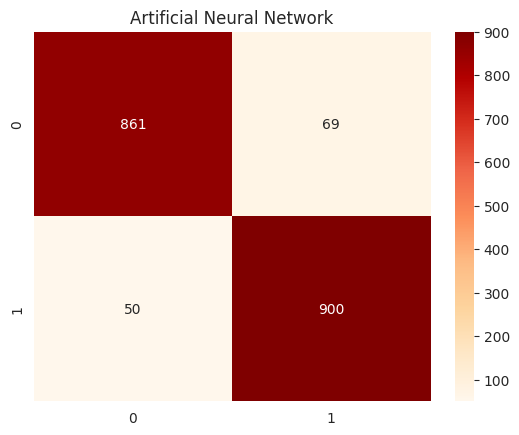

In [138]:
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
accuracy_score(y_test, y_pred_ann)
ann_report=classification_report(y_test, y_pred_ann)
print(accuracy_score(y_test, y_pred_ann))
sns.heatmap(confusion_matrix(y_test, y_pred_ann),annot=True,cmap='OrRd', fmt='g' )
plt.title('Artificial Neural Network')

In [139]:
print(ann_report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       930
           1       0.93      0.95      0.94       950

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



# Dictionary of Trained Models

In [140]:
models = {
    "Logistic Regression": LR,
    "Random Forest": RF,
    "Decision Tree Classification": DTC,
    "Naive Bayes": NB,
    "K-Nearest Neighbors (K-NN)": KNN,
    "Kernel SVM": KSVM,
    "XGBboost": XGB,
    "Catboost": CAT
}

# Applying k-Fold Cross Validation on all models

In [141]:
for names,model, in models.items():
  print(f" Cross validation results {names}")
  k_fold_cross_validation(model,X_train,y_train,15)
  print()

Streaming output truncated to the last 5000 lines.
7:	learn: 0.5021065	total: 50.7ms	remaining: 6.29s
8:	learn: 0.4854847	total: 56.8ms	remaining: 6.25s
9:	learn: 0.4694835	total: 62.8ms	remaining: 6.21s
10:	learn: 0.4526115	total: 69ms	remaining: 6.2s
11:	learn: 0.4381426	total: 75.2ms	remaining: 6.19s
12:	learn: 0.4185447	total: 84.8ms	remaining: 6.44s
13:	learn: 0.4039940	total: 91.3ms	remaining: 6.43s
14:	learn: 0.3902468	total: 97.6ms	remaining: 6.41s
15:	learn: 0.3751386	total: 104ms	remaining: 6.38s
16:	learn: 0.3611253	total: 110ms	remaining: 6.36s
17:	learn: 0.3508653	total: 116ms	remaining: 6.33s
18:	learn: 0.3413268	total: 124ms	remaining: 6.41s
19:	learn: 0.3307423	total: 130ms	remaining: 6.39s
20:	learn: 0.3206719	total: 137ms	remaining: 6.37s
21:	learn: 0.3137890	total: 143ms	remaining: 6.36s
22:	learn: 0.3063463	total: 149ms	remaining: 6.33s
23:	learn: 0.2990996	total: 155ms	remaining: 6.32s
24:	learn: 0.2925872	total: 161ms	remaining: 6.29s
25:	learn: 0.2857366	total: 1

# Evaluating and visualise results.

<Figure size 600x400 with 0 Axes>

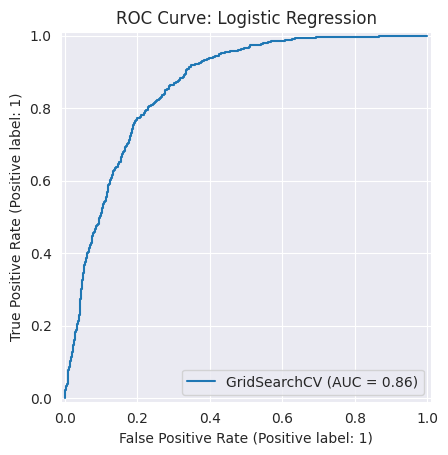

<Figure size 600x400 with 0 Axes>

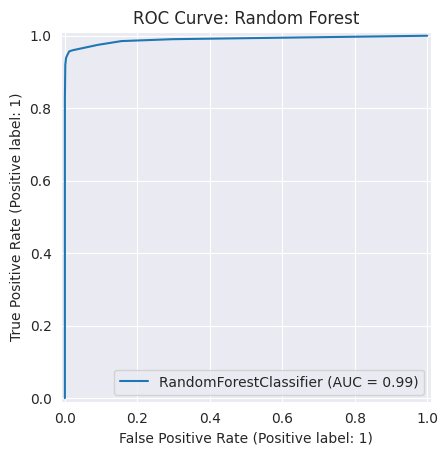

<Figure size 600x400 with 0 Axes>

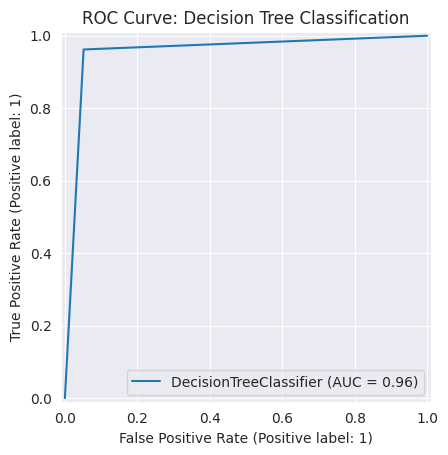

<Figure size 600x400 with 0 Axes>

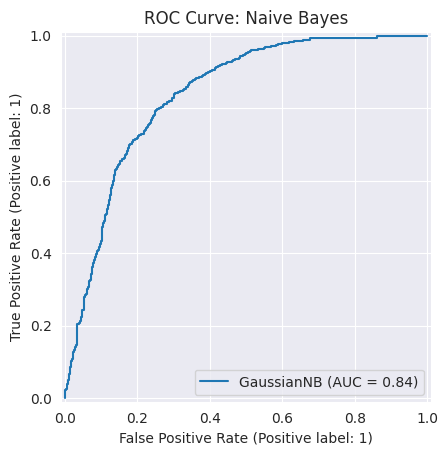

<Figure size 600x400 with 0 Axes>

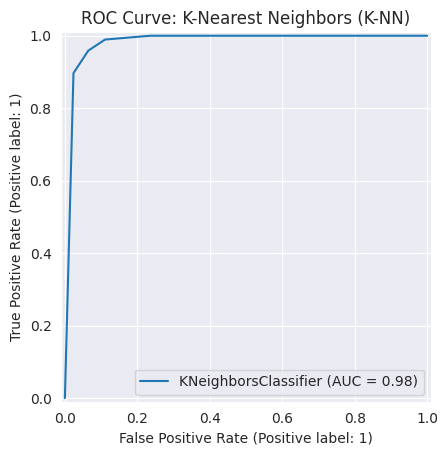

<Figure size 600x400 with 0 Axes>

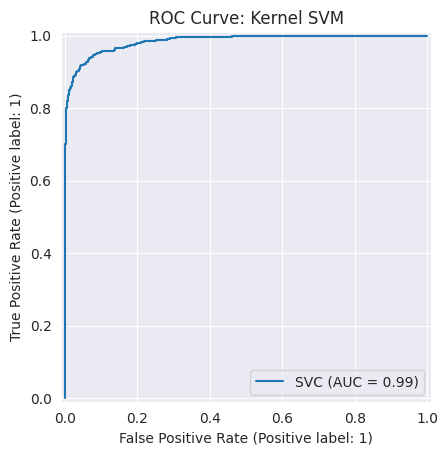

<Figure size 600x400 with 0 Axes>

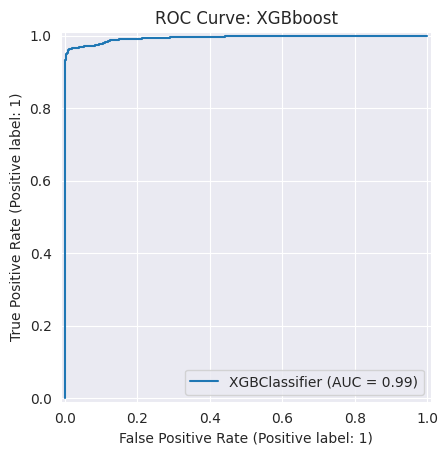

<Figure size 600x400 with 0 Axes>

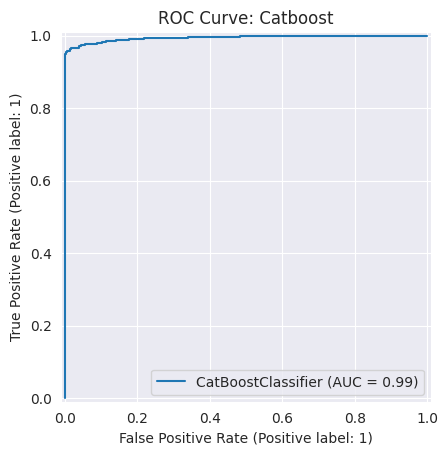

In [142]:
for name, model in models.items():
    plt.figure(figsize=(6, 4))
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve: {name}")
    plt.grid(True)
    plt.show()

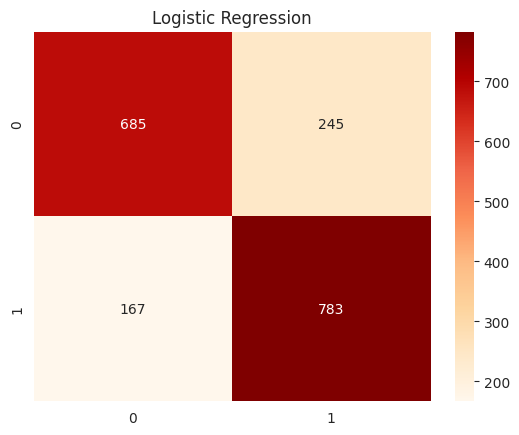

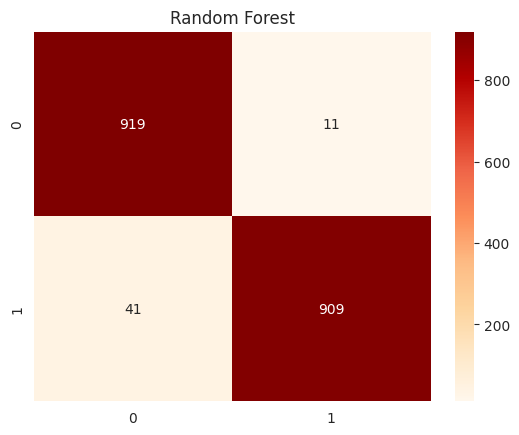

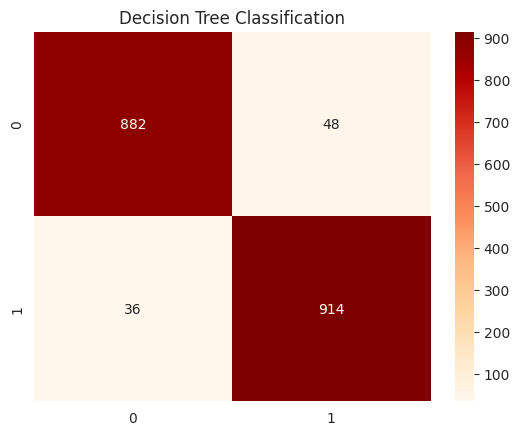

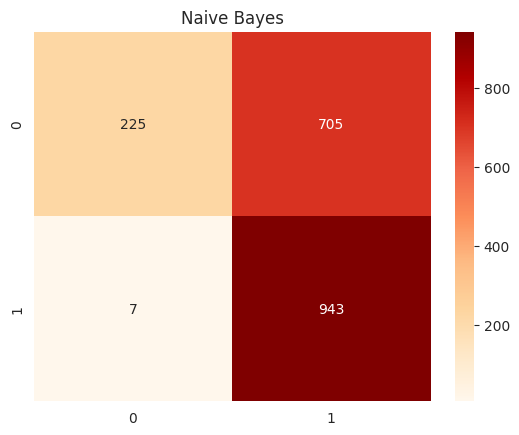

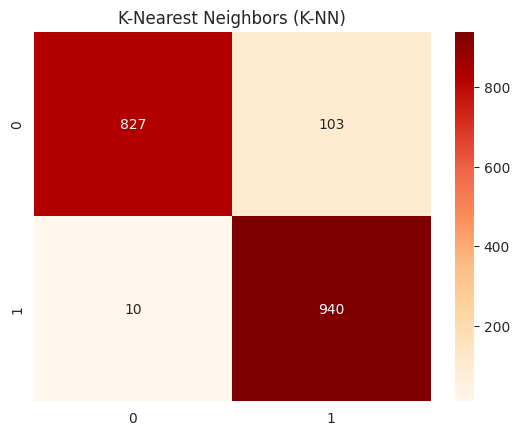

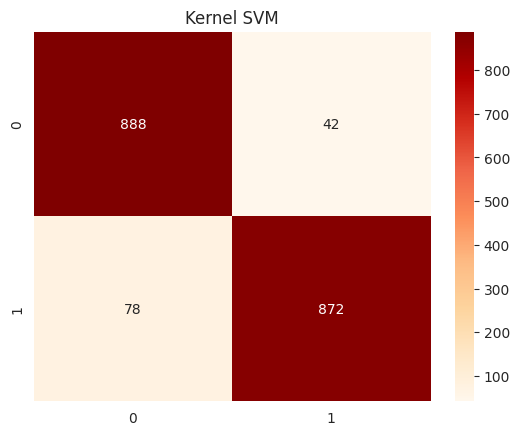

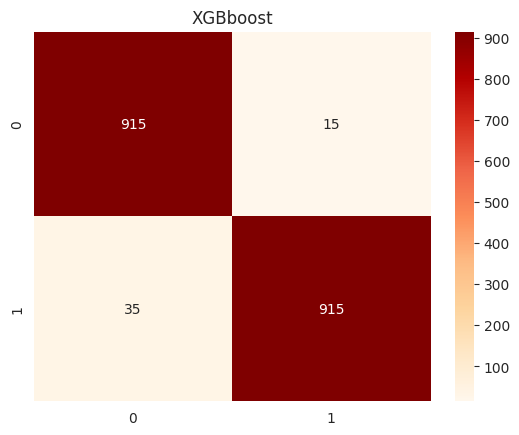

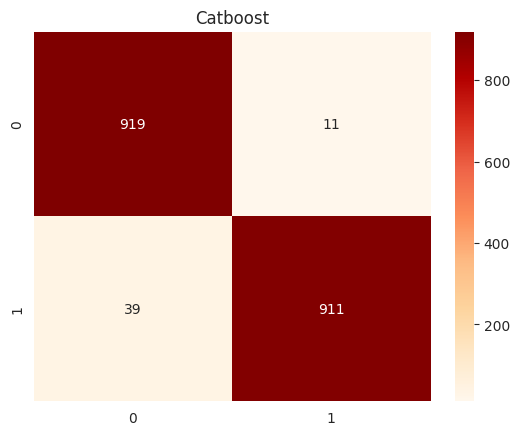

In [143]:
for names,model, in models.items():
  plt.title(names)
  plot_confusion_matrix(model)
